<a href="https://colab.research.google.com/github/MagaliDrumare/Comet-MLOps-Platform-/blob/main/Wheel_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 3: Object Detection

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>


* In this classroom, the libraries have been already installed for you.
* If you would like to run this code on your own machine, you need to install the following:
    ```
    !pip install -q comet_ml transformers ultralytics torch
    ```

In [ ]:
 !pip install -q comet_ml transformers ultralytics torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.4/677.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.2/300.2 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 979.1/979.1 kB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 57.8 MB/s eta 0:00:00


### Set up Comet

In [ ]:
import comet_ml

Info about ['Comet'](https://www.comet.com/site/?utm_source=dlai&utm_medium=course&utm_campaign=prompt_engineering_for_vision_models&utm_content=dlai_L3)

In [ ]:
comet_ml.init(anonymous=True, project_name="3: OWL-ViT + SAM")

COMET INFO: Comet is now logging experiments in anonymous mode, they will be publicly accessing by using the experiment url
COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).


In [ ]:
exp = comet_ml.Experiment()

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/supporting-jail-6354/3-owl-vit-sam/8ddafb6898b242f89c206dc1aa7d7587

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


### Load the image

In [ ]:
# To display the image
from PIL import Image

In [ ]:
logged_artifact = exp.get_artifact("L3-data", "anmorgan24")

>Note: the images referenced in this notebook have already been uploaded to the Jupyter directory, in this classroom, for your convenience. For further details, please refer to the **Appendix** section located at the end of the lessons.

In [ ]:
local_artifact = logged_artifact.download("./")

COMET INFO: Artifact 'anmorgan24/L3-data:1.0.0' download has been started asynchronously
COMET INFO: Still downloading 6 file(s), remaining 24.23 MB/24.23 MB
COMET INFO: Artifact 'anmorgan24/L3-data:1.0.0' has been successfully downloaded


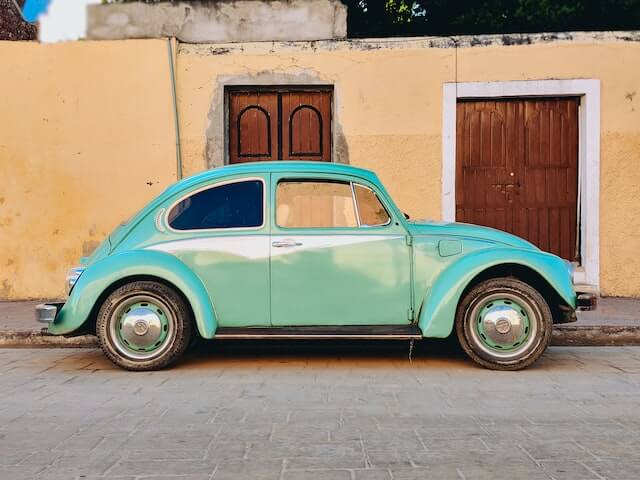

In [ ]:
# Display the images
raw_image = Image.open("car.png")
raw_image

### Get bounding boxes with OWL-ViT object detection model

>Note: `pipeline` is already installed for you in this classroom.

In [ ]:
from transformers import pipeline

In [ ]:
OWL_checkpoint = "./models/google/owlvit-base-patch32"

Info about ['google/owlvit-base-patch32'](https://huggingface.co/google/owlvit-base-patch32)

* Build the pipeline for the detector model.

In [ ]:
from transformers import pipeline

# Use the correct model identifier from the Hugging Face Hub
OWL_checkpoint = "google/owlvit-base-patch32"

# Load the model
detector = pipeline(
    model= OWL_checkpoint,
    task="zero-shot-object-detection"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.42k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/613M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

In [ ]:
# What you want to identify in the image
text_prompt = "wheel"

In [ ]:
output = detector(
    raw_image,
    candidate_labels = [text_prompt]
)

In [ ]:
# Print the output to identify the bounding boxes detected
output

[{'score': 0.19028426706790924,
  'label': 'dog',
  'box': {'xmin': 888, 'ymin': 376, 'xmax': 2280, 'ymax': 2432}},
 {'score': 0.17161908745765686,
  'label': 'dog',
  'box': {'xmin': 2026, 'ymin': 728, 'xmax': 3116, 'ymax': 2436}}]

* Use the **util**'s function to prompt boxes in top of the image.

>Note: ```utils``` is an additional file containing the methods that have been already developed for you to be used in this classroom.
For further details, please refer to the **Appendix** section located at the end of the lessons.

In [ ]:
from utils import preprocess_outputs

In [ ]:
from utils import show_boxes_and_labels_on_image

In [ ]:
input_scores, input_labels, input_boxes = preprocess_outputs(output)

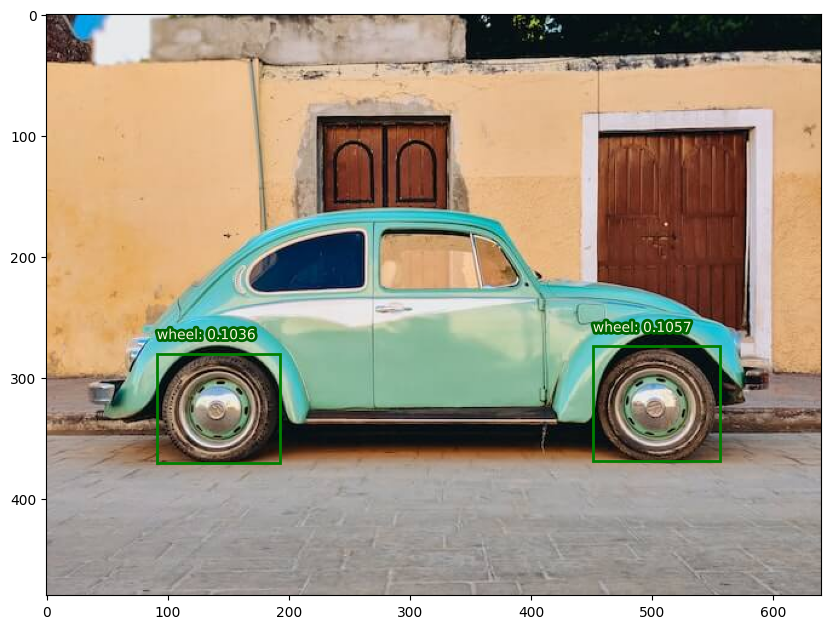

In [ ]:
# Show the image with the bounding boxes
show_boxes_and_labels_on_image(
    raw_image,
    input_boxes[0],
    input_labels,
    input_scores
)

### Additional Resources

* For more on how to use [Comet](https://www.comet.com/site/?utm_source=dlai&utm_medium=course&utm_campaign=prompt_engineering_for_vision_models&utm_content=dlai_L3) for experiment tracking, check out this [Quickstart Guide](https://colab.research.google.com/drive/1jj9BgsFApkqnpPMLCHSDH-5MoL_bjvYq?usp=sharing) and the [Comet Docs](https://www.comet.com/docs/v2/?utm_source=dlai&utm_medium=course&utm_campaign=prompt_engineering_for_vision_models&utm_content=dlai_L3).
* This course was based off a set of two blog articles from Comet. Explore them here for more on how to use newer versions of Stable Diffusion in this pipeline, additional tricks to improve your inpainting results, and a breakdown of the pipeline architecture:
  * [SAM + Stable Diffusion for Text-to-Image Inpainting](https://www.comet.com/site/blog/sam-stable-diffusion-for-text-to-image-inpainting/?utm_source=dlai&utm_medium=course&utm_campaign=prompt_engineering_for_vision_models&utm_content=dlai_L3)
  * [Image Inpainting for SDXL 1.0 Base Model + Refiner](https://www.comet.com/site/blog/image-inpainting-for-sdxl-1-0-base-refiner/?utm_source=dlai&utm_medium=course&utm_campaign=prompt_engineering_for_vision_models&utm_content=dlai_L3)